In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Libraries
import pandas as pd
#----------------------------------------------------
#reading data
data = pd.read_csv('Video-Game-Sales.csv',parse_dates=["Year"])
data.drop("Rank", axis =1, inplace = True)

#data.describe()

data.head()
# data.info()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          16598 non-null  object        
 1   Platform      16598 non-null  object        
 2   Year          16327 non-null  datetime64[ns]
 3   Genre         16598 non-null  object        
 4   Publisher     16540 non-null  object        
 5   NA_Sales      16598 non-null  float64       
 6   EU_Sales      16598 non-null  float64       
 7   JP_Sales      16598 non-null  float64       
 8   Other_Sales   16598 non-null  float64       
 9   Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 1.3+ MB


In [ ]:
data.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


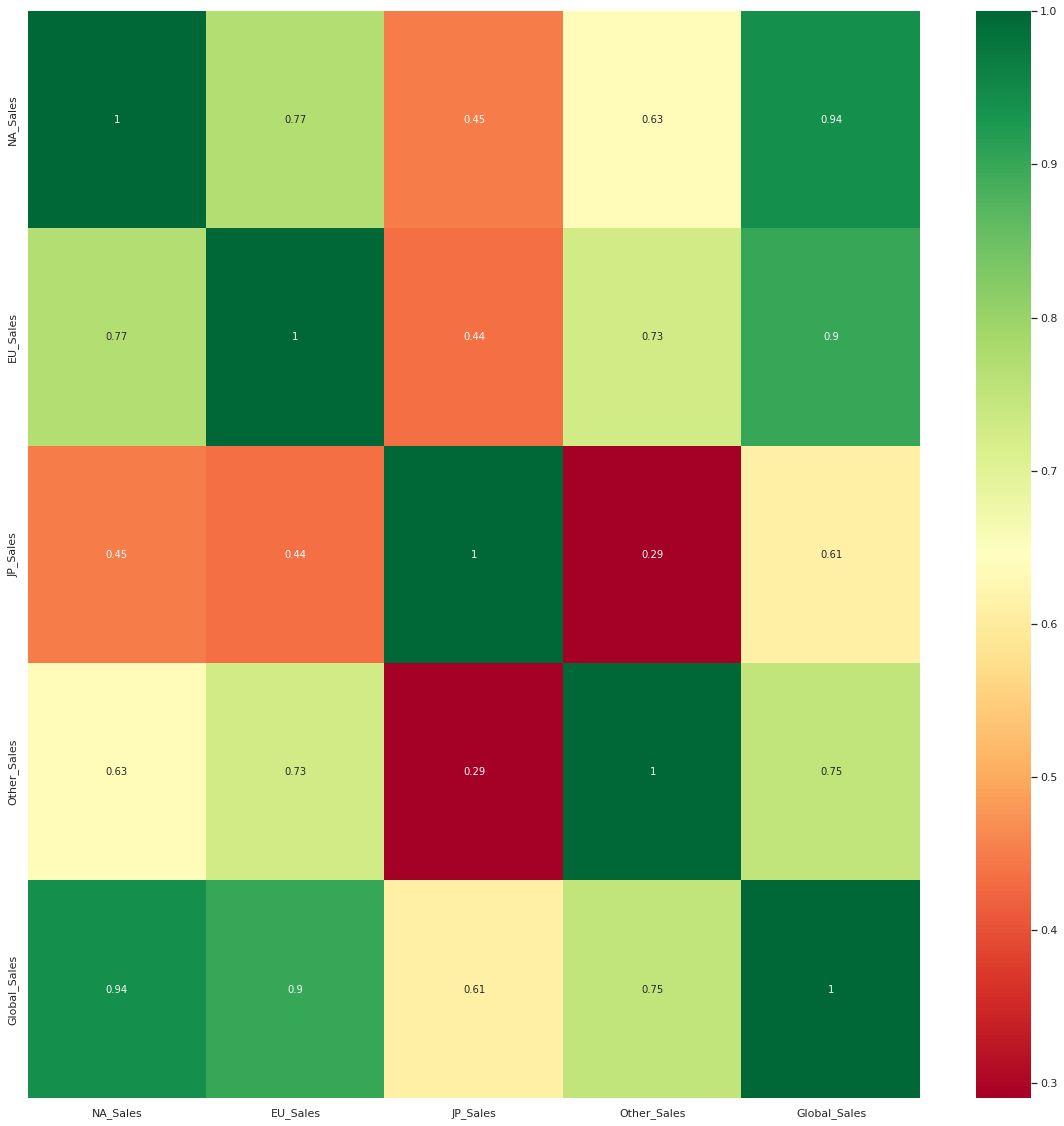

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

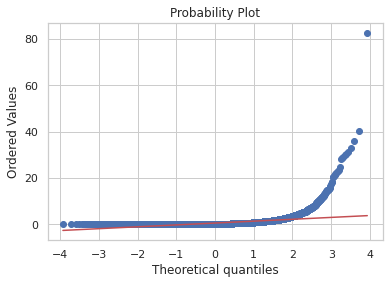

In [ ]:
from scipy import stats
stats.probplot(data["Global_Sales"], plot = plt);

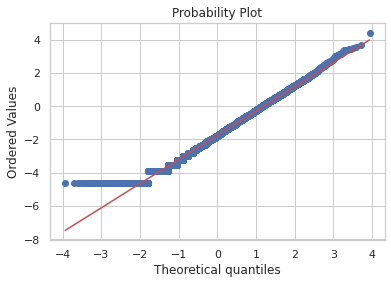

In [ ]:
data["Global_Sales"] = np.log(data["Global_Sales"])
stats.probplot(data["Global_Sales"], plot = plt);

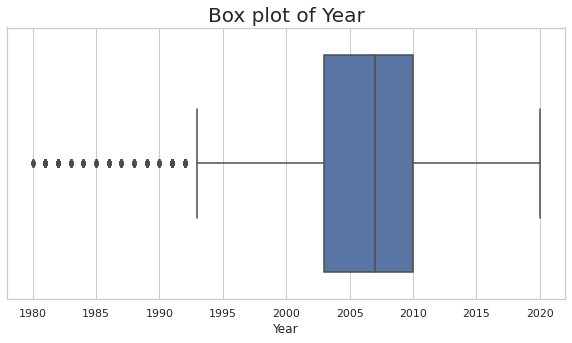

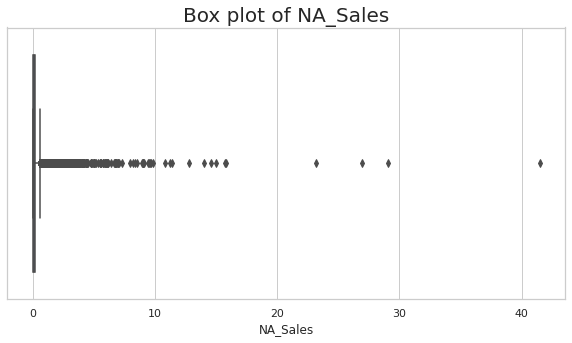

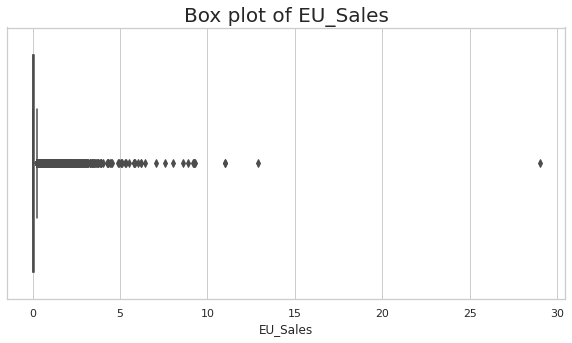

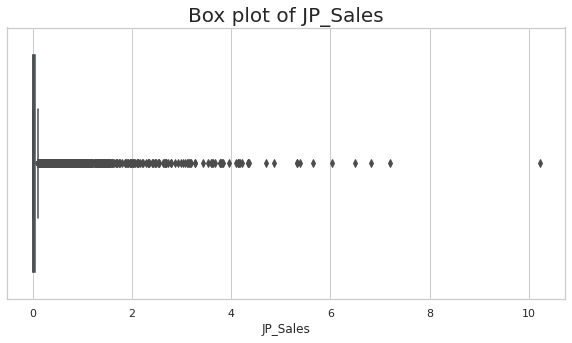

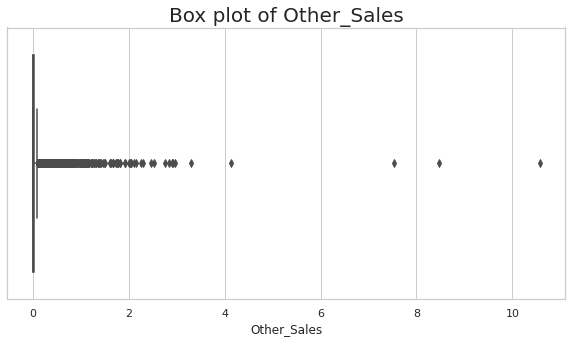

In [ ]:
numerical_features = data.select_dtypes(exclude = ["object"]).columns

df1 = pd.read_csv('Video-Game-Sales.csv',usecols=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'])

for column in df1.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df1[column])
    plt.title('Box plot of {}'.format(column), fontsize=20)

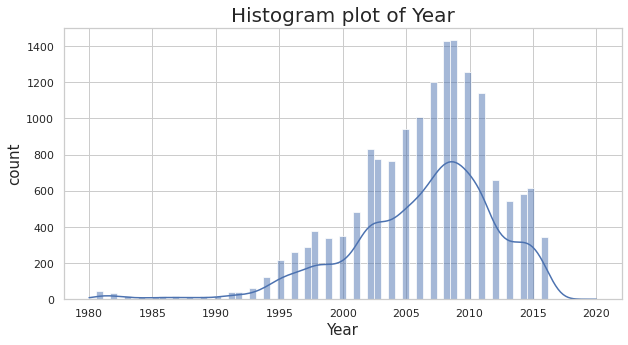

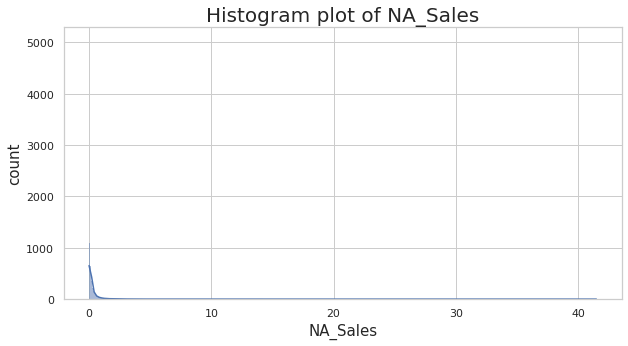

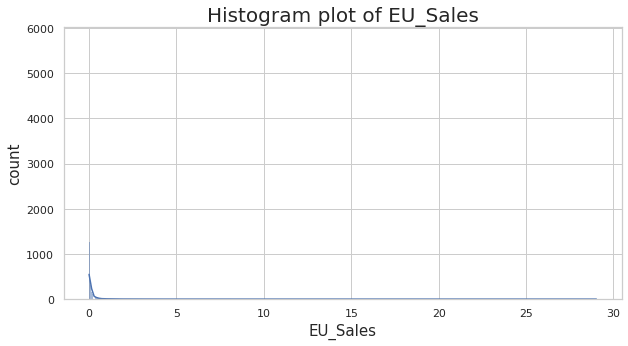

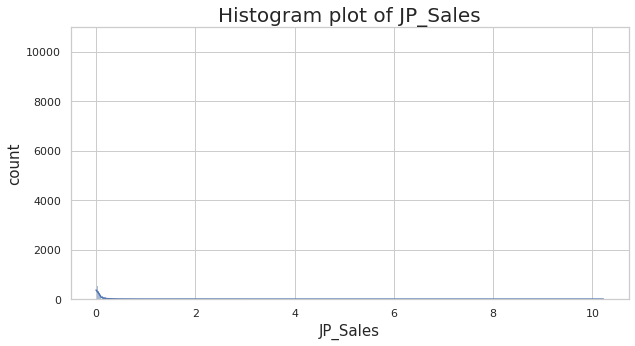

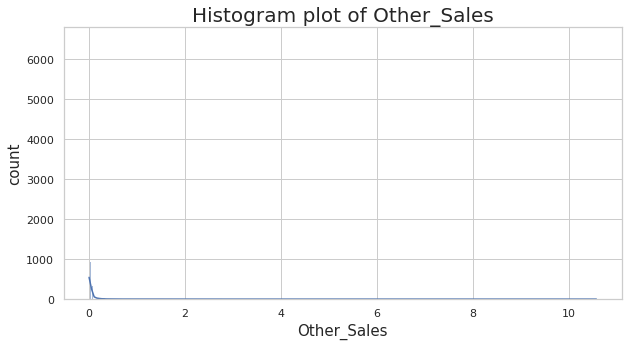

In [ ]:
for column in df1.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.histplot(df1[column], kde=True)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.title('Histogram plot of {}'.format(column), fontsize=20)


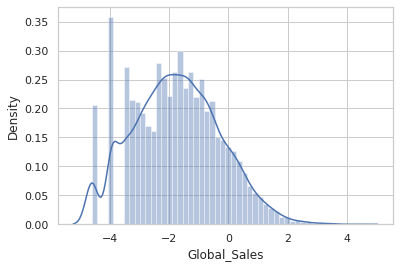

In [ ]:
sns.distplot(data['Global_Sales'])

In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

## Lets Find the realtionship between them and Y

for feature in discrete_feature:
    data=data.copy()
    data.groupby(feature)['Global_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Global_Sales')
    plt.title(feature)
    plt.show()

Discrete Variables Count: 0


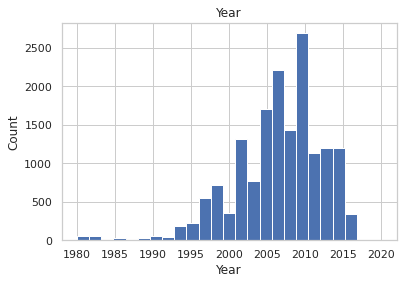

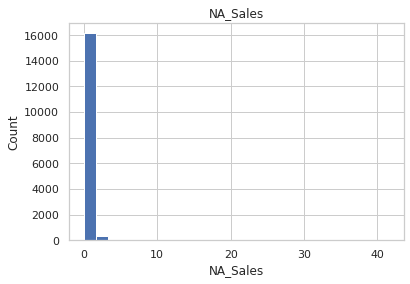

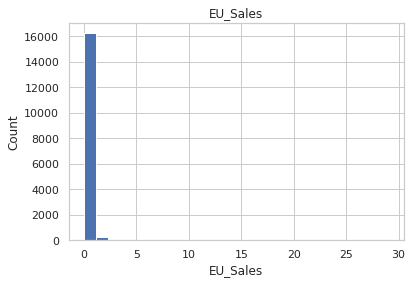

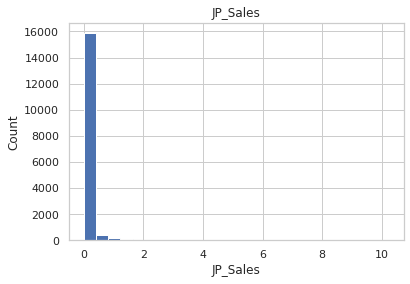

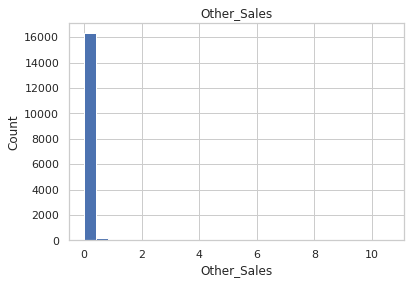

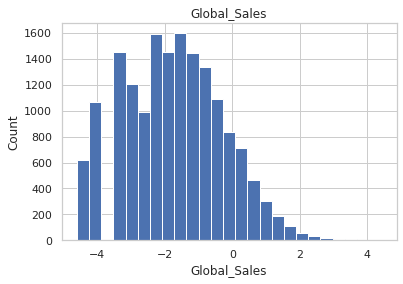

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature ]

## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


In [ ]:
def count_unique_values(data):
    
    total = data.count()
    temp = pd.DataFrame(total)
    temp.columns = ['Total']            # Count total number of non-null values
    
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()    # Get unique values for each column
        uniques.append(unique)
    temp['Uniques'] = uniques
    
    return(np.transpose(temp))
count_unique_values(data)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Total,16598,16598,16327,16598,16540,16598,16598,16598,16598,16598
Uniques,11493,31,39,12,578,409,305,244,157,623


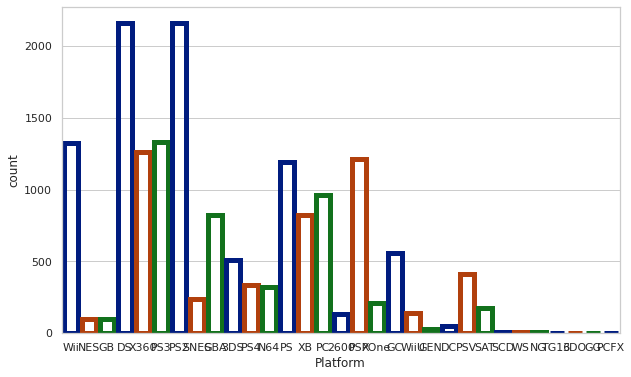

In [ ]:
def CPlot(feature) : 
    global data
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

CPlot("Platform")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          16598 non-null  object        
 1   Platform      16598 non-null  object        
 2   Year          16327 non-null  datetime64[ns]
 3   Genre         16598 non-null  object        
 4   Publisher     16540 non-null  object        
 5   NA_Sales      16598 non-null  float64       
 6   EU_Sales      16598 non-null  float64       
 7   JP_Sales      16598 non-null  float64       
 8   Other_Sales   16598 non-null  float64       
 9   Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 1.3+ MB


In [ ]:
# This will turn all of the string value into category values
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

#Finding Categorical Featurs
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'category' ]
print(categorical_features )

#convert all cols to numbers
cols= categorical_features  
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

['Name', 'Platform', 'Genre', 'Publisher']


In [ ]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,11007,26,2006-01-01,10,359,41.49,29.02,3.77,8.46,4.415703
1,9327,11,1985-01-01,4,359,29.08,3.58,6.81,0.77,3.694862
2,5573,26,2008-01-01,6,359,15.85,12.88,3.79,3.31,3.578506
3,11009,26,2009-01-01,10,359,15.75,11.01,3.28,2.96,3.496508
4,7346,5,1996-01-01,7,359,11.27,8.89,10.22,1.00,3.445852


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Year,271,0.016327
Name,0,0.000000
Platform,0,0.000000
Genre,0,0.000000
Publisher,0,0.000000
NA_Sales,0,0.000000
EU_Sales,0,0.000000
JP_Sales,0,0.000000
Other_Sales,0,0.000000
Global_Sales,0,0.000000


In [ ]:
data['Year'].fillna(data.Year.median(),inplace=True)

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Name,0,0.0
Platform,0,0.0
Year,0,0.0
Genre,0,0.0
Publisher,0,0.0
NA_Sales,0,0.0
EU_Sales,0,0.0
JP_Sales,0,0.0
Other_Sales,0,0.0
Global_Sales,0,0.0


In [ ]:
#Zscore_outlier Method
out=[]
def Zscore_outlier(data):
    for i in data: 
       z = (i-np.mean(data))/np.std(data)
       if np.abs(z) > 3: 
         out.append(i)                   
    print("Year:",out)
Zscore_outlier(data['Year'])

Year: [Timestamp('1985-01-01 00:00:00'), Timestamp('1989-01-01 00:00:00'), Timestamp('1984-01-01 00:00:00'), Timestamp('1989-01-01 00:00:00'), Timestamp('1988-01-01 00:00:00'), Timestamp('1982-01-01 00:00:00'), Timestamp('1988-01-01 00:00:00'), Timestamp('1986-01-01 00:00:00'), Timestamp('1988-01-01 00:00:00'), Timestamp('1989-01-01 00:00:00'), Timestamp('1981-01-01 00:00:00'), Timestamp('1987-01-01 00:00:00'), Timestamp('1980-01-01 00:00:00'), Timestamp('1989-01-01 00:00:00'), Timestamp('1984-01-01 00:00:00'), Timestamp('1984-01-01 00:00:00'), Timestamp('1988-01-01 00:00:00'), Timestamp('1985-01-01 00:00:00'), Timestamp('1983-01-01 00:00:00'), Timestamp('1986-01-01 00:00:00'), Timestamp('1987-01-01 00:00:00'), Timestamp('1980-01-01 00:00:00'), Timestamp('1986-01-01 00:00:00'), Timestamp('1986-01-01 00:00:00'), Timestamp('1987-01-01 00:00:00'), Timestamp('1986-01-01 00:00:00'), Timestamp('1988-01-01 00:00:00'), Timestamp('1987-01-01 00:00:00'), Timestamp('1983-01-01 00:00:00'), Timesta

In [ ]:
out=[]
def Zscore_outlier(data):
    for i in data: 
       z = (i-np.mean(data))/np.std(data)
       if np.abs(z) > 3: 
         out.append(i)                   
    print("Global_Sales:",out)
Zscore_outlier(data['Global_Sales'])

Global_Sales: [4.4157031610332655, 3.6948615257914836, 3.578506396632566, 3.4965075614664802, 3.445852022202587, 3.40982670836021, 3.4015306594522756, 3.367985247456042, 3.3541057741283047, 3.343215099123808, 3.2092294478163956, 3.1535903581695712, 3.139832617527748, 3.1232455938529506, 3.091042453358316, 3.0828269804049246, 3.0633909220278057, 3.035433640405543, 3.0257763949023677, 3.006672213592325, 2.9101743851923443, 2.8981194446869907, 2.8495497633759097, 2.7960610784249234, 2.7819200496686656, 2.7631695003232895, 2.729159164312445, 2.72785282839839, 2.7067159780890733, 2.6919208191723265, 2.6837575085331657, 2.6837575085331657, 2.66374994220563, 2.65605490598383]


In [ ]:
counts = data.nunique()
to_del = [i for i , v in enumerate(counts) if v == 1]
print(to_del)
data.drop(to_del, axis=1,inplace=True)
####OR
def remove_constant_value_features(data):
    return [e for e in data.columns if data[e].nunique() == 1]
drop_col = remove_constant_value_features(data)
print(drop_col)

[]
[]


In [ ]:
def remove_distinct_value_features(data):
    return [e for e in data.columns if data[e].nunique() == data.shape[0]]
drop_col = remove_distinct_value_features(data)
print(drop_col)

[]


In [ ]:
data["saleYear"] = data.Year.dt.year
data["saleMonth"] = data.Year.dt.month
data["saleDay"] = data.Year.dt.day

In [ ]:
#X Data
X = data.drop(['Global_Sales'], axis=1, inplace=False)
#print('X Data is \n' , X.head())
#print('X shape is ' , X.shape)

#y Data
y = data['Global_Sales']
#print('y Data is \n' , y.head())
#print('y shape is ' , y.shape)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         16598 non-null  int64         
 1   Platform     16598 non-null  int64         
 2   Year         16598 non-null  datetime64[ns]
 3   Genre        16598 non-null  int64         
 4   Publisher    16598 non-null  int64         
 5   NA_Sales     16598 non-null  float64       
 6   EU_Sales     16598 non-null  float64       
 7   JP_Sales     16598 non-null  float64       
 8   Other_Sales  16598 non-null  float64       
 9   saleYear     16598 non-null  int64         
 10  saleMonth    16598 non-null  int64         
 11  saleDay      16598 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 1.5 MB


In [ ]:
X.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,saleYear,saleMonth,saleDay
0,11007,26,2006-01-01,10,359,41.49,29.02,3.77,8.46,2006,1,1
1,9327,11,1985-01-01,4,359,29.08,3.58,6.81,0.77,1985,1,1
2,5573,26,2008-01-01,6,359,15.85,12.88,3.79,3.31,2008,1,1
3,11009,26,2009-01-01,10,359,15.75,11.01,3.28,2.96,2009,1,1
4,7346,5,1996-01-01,7,359,11.27,8.89,10.22,1.00,1996,1,1


In [ ]:
X.drop("Year",axis=1,inplace = True) 

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  int64  
 1   Platform     16598 non-null  int64  
 2   Genre        16598 non-null  int64  
 3   Publisher    16598 non-null  int64  
 4   NA_Sales     16598 non-null  float64
 5   EU_Sales     16598 non-null  float64
 6   JP_Sales     16598 non-null  float64
 7   Other_Sales  16598 non-null  float64
 8   saleYear     16598 non-null  int64  
 9   saleMonth    16598 non-null  int64  
 10  saleDay      16598 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.4 MB


In [ ]:
# Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#----------------------------------------------------

#----------------------------------------------------
#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
#print('X \n' , X[:10])
#print('y \n' , y[:10])

#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)

{'LinearRegression': 0.3215588486330788, 'SGDRegressor ': 0.21555226839240127, 'Lasso ': -0.000282249497107534, 'Ridge ': 0.32156161754836365, 'Random Forest ': 0.9943549112568308, 'Gradient Boosting ': 0.9933336990560069, 'SVR ': 0.8836255654032424, 'DecisionTree': 0.9890278165510806, 'KNN': 0.7517786596058554}


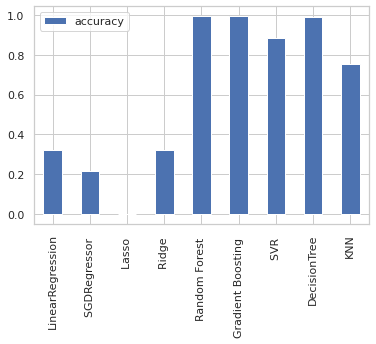

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
# Put models in a dictionary
models = {"LinearRegression": LinearRegression(),
          "SGDRegressor " : SGDRegressor(), 
          "Lasso "        : Lasso(),
          "Ridge "        :  Ridge(),
          "Random Forest ": RandomForestRegressor(),
          "Gradient Boosting ": GradientBoostingRegressor(),
          "SVR "          : SVR(),
          "DecisionTree"  :DecisionTreeRegressor(),
          "KNN"           :KNeighborsRegressor()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(44)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
print(np.array(model_scores))

#Model Comparison
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();


In [ ]:
#Import Libraries
from sklearn.ensemble import GradientBoostingRegressor
#----------------------------------------------------

#----------------------------------------------------
#Applying Gradient Boosting Regressor Model 

'''
sklearn.ensemble.GradientBoostingRegressor(loss='ls’, learning_rate=0.1,n_estimators=100, subsample=
                                           1.0, criterion='friedman_mse’,min_samples_split=2,min_samples_leaf=1,
                                           min_weight_fraction_leaf=0.0,max_depth=3,min_impurity_decrease=0.0,
                                           min_impurity_split=None,init=None, random_state=None,max_features=None, alpha=0.9,
                                           verbose=0, max_leaf_nodes=None,warm_start=False, presort='auto'
                                           , validation_fraction=0.1,n_iter_no_change=None, tol=0.0001)
'''

GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate = 1.5 ,random_state=33)
GBRModel.fit(X_train, y_train)

#Calculating Details
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = GBRModel.predict(X_test)


GBRModel Train Score is :  0.9873357633934505
GBRModel Test Score is :  0.9857754345683716


In [ ]:
print("The Real Value Is    :",np.array(y_test[:10]))
print("=====================================================================================")
print("The Predect Value Is :" ,y_pred[:10])

The Real Value Is    : [-1.89711998 -0.34249031 -0.63487827 -2.81341072 -2.52572864 -1.60943791
 -0.28768207 -2.65926004 -1.02165125 -2.81341072]
The Predect Value Is : [-1.63990611 -0.41096565 -0.62962597 -2.78767284 -2.45962432 -1.72058765
 -0.16761112 -2.80769985 -0.9239358  -2.74290463]


In [ ]:
#Import Libraries
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
#----------------------------------------------------

#----------------------------------------------------
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

#----------------------------------------------------
#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  0.11716626619594409
Mean Squared Error Value is :  0.029975907809753025
Median Absolute Error Value is :  0.07697704057918209


In [ ]:
import pickle
# Save an extisting model to file
pickle.dump(GBRModel, open("GBRModel1.pkl", "wb"))
# Load a saved model
loaded_pickle_model = pickle.load(open("GBRModel1.pkl", "rb"))
print(loaded_pickle_model.score(X_test,y_test))


0.9866332888802243
